In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [4]:
# We load the dataset from a CSV file
path_to_dataset = r"C:\Users\dkg14\Desktop\AAP_data.csv"
df = pd.read_csv(path_to_dataset)

df = df.drop(columns=['Name', 'date'])

In [7]:
# We add percentage-deltas from the previous day
df['op%D'] = df['open'].pct_change() 
df['hi%D'] = df['high'].pct_change() 
df['lo%D'] = df['low'].pct_change()
df['cl%D'] = df['close'].pct_change()
df['vol%D'] = df['volume'].pct_change()

# We drop NaN values
df = df.dropna()

print(df.head())

    open   high      low  close   volume      op%D      hi%D      lo%D  \
2  78.39  78.63  77.5132  78.60   876859 -0.003306 -0.003548  0.003667   
3  78.90  79.13  77.8500  78.97  1038574  0.006506  0.006359  0.004345   
4  78.66  79.72  78.5850  78.84  1005376 -0.003042  0.007456  0.009441   
5  78.83  79.18  77.9300  79.00  1247063  0.002161 -0.006774 -0.008335   
6  79.12  81.44  78.5700  80.72  1730690  0.003679  0.028543  0.008212   

       cl%D     vol%D  
2  0.002679  0.156782  
3  0.004707  0.184425  
4 -0.001646 -0.031965  
5  0.002029  0.240395  
6  0.021772  0.387813  


In [8]:
# We drop everything except the percentage deltas
df = df.drop(columns=['open', 'high', 'low', 'close', 'volume'])

# We convert DataFrame to NumPy array
data = df.to_numpy()

In [38]:
# We split into train, validation, and test sets
train_size = int(len(data) * 0.7)
val_size = int(len(data) * 0.1)
train, val, test = data[:train_size], data[train_size:train_size + val_size], data[train_size + val_size:]

In [39]:
window_length = 15
trainX, trainY = [], []
for i in range(len(train) - window_length - 1):
    trainX.append(train[i:i + window_length])
    trainY.append(train[i + window_length, 3])

trainX, trainY = np.array(trainX), np.array(trainY)

valX, valY = [], []
for i in range(len(val) - window_length - 1):
    valX.append(val[i:i + window_length])
    valY.append(val[i + window_length, 3])
valX, valY = np.array(valX), np.array(valY)

testX, testY = [], []
for i in range(len(test) - window_length - 1):
    testX.append(test[i:i + window_length])
    testY.append(test[i + window_length, 3])
testX, testY = np.array(testX), np.array(testY)


In [40]:
# We reshape the data for LSTM
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], trainX.shape[2]))
valX = np.reshape(valX, (valX.shape[0], valX.shape[1], valX.shape[2]))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], testX.shape[2]))


In [17]:
# We make and train the model
model = Sequential()
model.add(LSTM(50, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

print("BEGINNING TRAINING")

BEGINNING TRAINING


In [18]:
model.fit(trainX, trainY, epochs=250, batch_size=1, verbose=2)

print("TRAINING COMPLETE")

Epoch 1/250
863/863 - 3s - 3ms/step - loss: 4.8175e-04
Epoch 2/250
863/863 - 1s - 2ms/step - loss: 3.6267e-04
Epoch 3/250
863/863 - 1s - 2ms/step - loss: 3.3114e-04
Epoch 4/250
863/863 - 1s - 2ms/step - loss: 3.5054e-04
Epoch 5/250
863/863 - 1s - 2ms/step - loss: 3.0390e-04
Epoch 6/250
863/863 - 1s - 2ms/step - loss: 3.2994e-04
Epoch 7/250
863/863 - 1s - 2ms/step - loss: 3.0582e-04
Epoch 8/250
863/863 - 1s - 2ms/step - loss: 3.2506e-04
Epoch 9/250
863/863 - 1s - 2ms/step - loss: 2.9781e-04
Epoch 10/250
863/863 - 1s - 2ms/step - loss: 2.9815e-04
Epoch 11/250
863/863 - 1s - 2ms/step - loss: 2.9958e-04
Epoch 12/250
863/863 - 1s - 2ms/step - loss: 2.9757e-04
Epoch 13/250
863/863 - 1s - 2ms/step - loss: 2.9480e-04
Epoch 14/250
863/863 - 2s - 2ms/step - loss: 2.9031e-04
Epoch 15/250
863/863 - 1s - 2ms/step - loss: 2.9096e-04
Epoch 16/250
863/863 - 1s - 2ms/step - loss: 2.9521e-04
Epoch 17/250
863/863 - 1s - 2ms/step - loss: 2.8910e-04
Epoch 18/250
863/863 - 1s - 2ms/step - loss: 2.8890e-04
E

In [41]:
# We Produce Training predictions using the model
training_predictions = model.predict(trainX)

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [26]:
# We calculate Mean Squared Error for training data
training_MSE = mean_squared_error(trainY, training_predictions)
print('Training MSE: %.10f' % training_MSE)


Training MSE: 0.0000682614


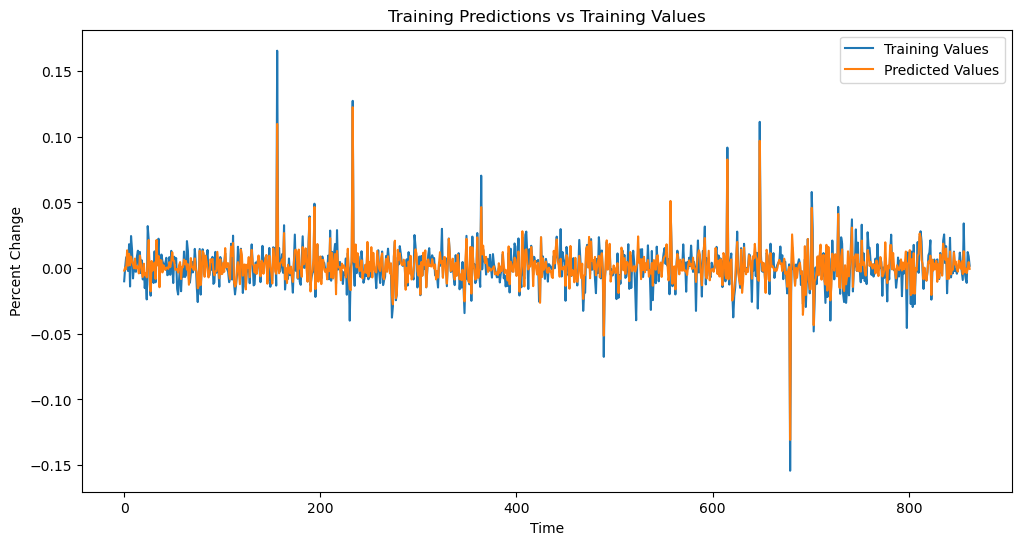

In [42]:
# We plot the training predictions against the training values
plt.figure(figsize=(12, 6))
plt.plot(trainY, label='Training Values')
plt.plot(training_predictions, label='Predicted Values')
plt.xlabel('Time')
plt.ylabel('Percent Change')
plt.title('Training Predictions vs Training Values')
plt.legend()
plt.show()

In [43]:
# We produce validation predictions using the model
val_predictions = model.predict(valX)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [44]:
# We calculate Mean Squared Error for the validation data
val_MSE = mean_squared_error(valY, val_predictions)
print('Validation MSE: %.10f' % val_MSE)

Validation MSE: 0.0005186861


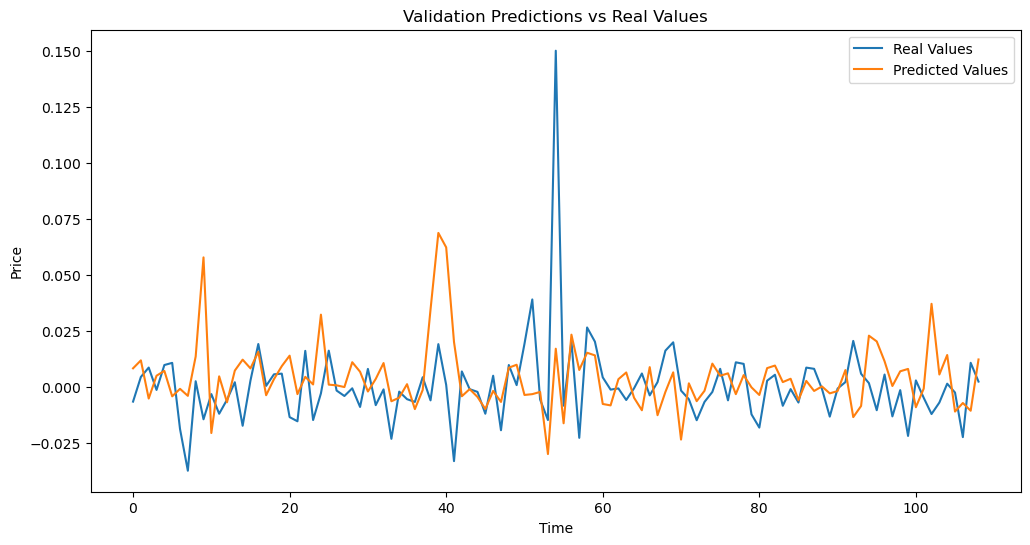

In [45]:
# Plot the validation predictions against the validation values
plt.figure(figsize=(12, 6))
plt.plot(valY, label='Real Values')
plt.plot(val_predictions, label='Predicted Values')
plt.xlabel('Time')
plt.ylabel('Percent Change in Price')
plt.title('Validation Predictions vs Real Values')
plt.legend()
plt.show()

In [46]:
# We generate test predictions using the model
test_predictions = model.predict(testX)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [47]:
# We calculate Mean Squared Error for test data
test_MSE = mean_squared_error(testY, test_predictions)
print('Test MSE: %.10f' % test_MSE)

Test MSE: 0.0008546041


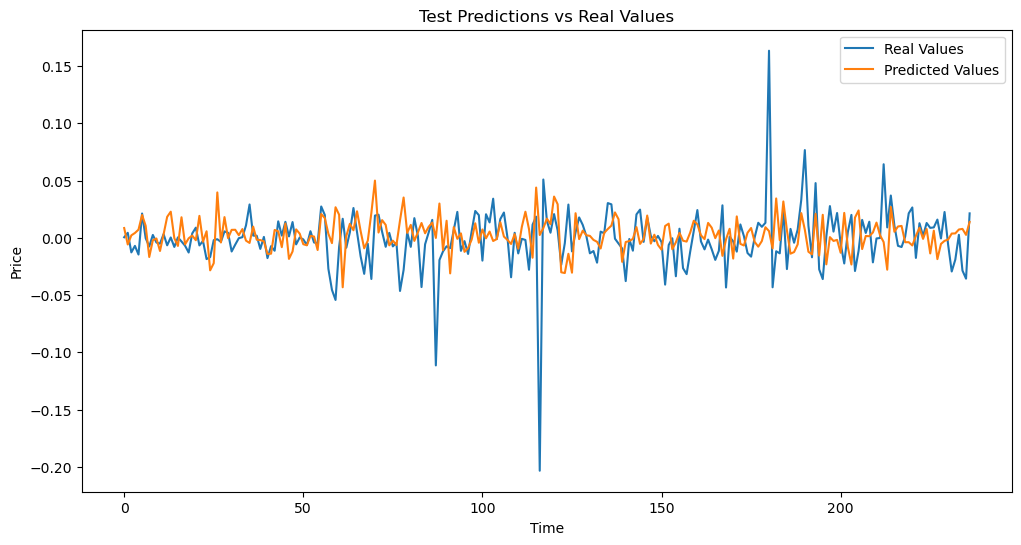

In [48]:
# We plot the test predictions against the test values
plt.figure(figsize=(12, 6))
plt.plot(testY, label='Real Values')
plt.plot(test_predictions, label='Predicted Values')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Test Predictions vs Real Values')
plt.legend()
plt.show()

In [49]:
# We calculate accuracy of predicting the stock's movement direction
Z = 0
for j in range(len(testY) - 1):
    if (test_predictions[j + 1] - test_predictions[j] > 0 and testY[j + 1] - testY[j] > 0) or \
       (test_predictions[j + 1] - test_predictions[j] < 0 and testY[j + 1] - testY[j] < 0):
        Z += 1

acc = Z / (len(testY) - 1)
print("Below is the accuracy in predicting the stock's movement:")
print(acc)

Below is the accuracy in predicting the stock's movement:
0.538135593220339
